<a href="https://colab.research.google.com/github/Gauravsin522/SCT_DS_4/blob/main/04_eda_accident.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
!pip install kaggle==1.5.12

In [14]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [15]:
!kaggle datasets download sobhanmoosavi/us-accidents

 96% 624M/653M [00:03<00:00, 271MB/s]
100% 653M/653M [00:03<00:00, 221MB/s]


In [16]:
!unzip us-accidents.zip

Archive:  us-accidents.zip
  inflating: US_Accidents_March23.csv  


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [18]:
df = pd.read_csv('US_Accidents_March23.csv')

In [19]:
df = df.sample(20000, random_state=42)

In [25]:
df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
7133276,A-7182628,Source1,1,2020-04-17 09:29:30,2020-04-17 10:29:30,26.706900,-80.119360,26.706900,-80.119360,0.000,...,False,False,False,False,True,False,Day,Day,Day,Day
5363845,A-5404588,Source1,2,2022-04-21 10:01:00.000000000,2022-04-21 11:44:08.000000000,38.781024,-121.265820,38.780377,-121.265815,0.045,...,False,False,True,False,False,False,Day,Day,Day,Day
155993,A-156000,Source3,3,2016-08-12 16:45:00,2016-08-12 17:15:00,33.985249,-84.269348,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
1861414,A-1871277,Source2,3,2019-09-20 15:22:16,2019-09-20 15:56:00,47.118706,-122.556908,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day
2021359,A-2031222,Source2,2,2019-06-03 16:55:43,2019-06-03 18:12:09,33.451355,-111.890343,NaN,NaN,0.000,...,False,False,False,False,False,False,Day,Day,Day,Day


In [57]:
df.dtypes

,0
ID,object
Source,object
Severity,int64
Start_Time,datetime64[ns]
End_Time,datetime64[ns]
Start_Lat,float64
Start_Lng,float64
End_Lat,float64
End_Lng,float64
Distance(mi),float64


In [34]:
# Convert 'Start_Time' column to datetime objects, letting pandas infer the format for each element
df['Start_Time'] = pd.to_datetime(df['Start_Time'], format='mixed')

In [36]:
# Convert 'Start_Time' column to datetime objects, letting pandas infer the format for each element
df['End_Time'] = pd.to_datetime(df['End_Time'], format='mixed')

In [53]:
df['Zipcode'] = df['Zipcode'].str.replace('-', '')
df['Zipcode'] = df['Zipcode'].str.replace('ND', '')


In [55]:
df['Zipcode'] = df['Zipcode'].astype(float)

In [56]:
df['Weather_Timestamp'] = pd.to_datetime(df['Weather_Timestamp'], format='mixed')

In [64]:
def detect_outliers(df, column):
  """
  Detects outliers in a specified column of a DataFrame using the IQR method.

  Args:
      df (pd.DataFrame): The input DataFrame.
      column (str): The name of the column to analyze for outliers.

  Returns:
      pd.Series: A boolean Series where True indicates an outlier.
  """
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
  return outliers

outliers_temp = detect_outliers(df, 'Temperature(F)')
print(f"Number of outliers in Temperature(F): {outliers_temp.sum()}")




Number of outliers in Temperature(F): 148


In [68]:
df = df.drop_duplicates()

In [72]:
# Identify categorical and numerical columns
categorical_cols = df.select_dtypes(include='object').columns
numerical_cols = df.select_dtypes(include=np.number).columns

print("Categorical Columns:")
print(categorical_cols)
print("\nNumerical Columns:")
numerical_cols

Categorical Columns:
Index(['ID', 'Source', 'Description', 'Street', 'City', 'County', 'State',
       'Country', 'Timezone', 'Airport_Code', 'Wind_Direction',
       'Weather_Condition', 'Sunrise_Sunset', 'Civil_Twilight',
       'Nautical_Twilight', 'Astronomical_Twilight'],
      dtype='object')

Numerical Columns:


Index(['Severity', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng',
       'Distance(mi)', 'Zipcode', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)',
       'Precipitation(in)'],
      dtype='object')

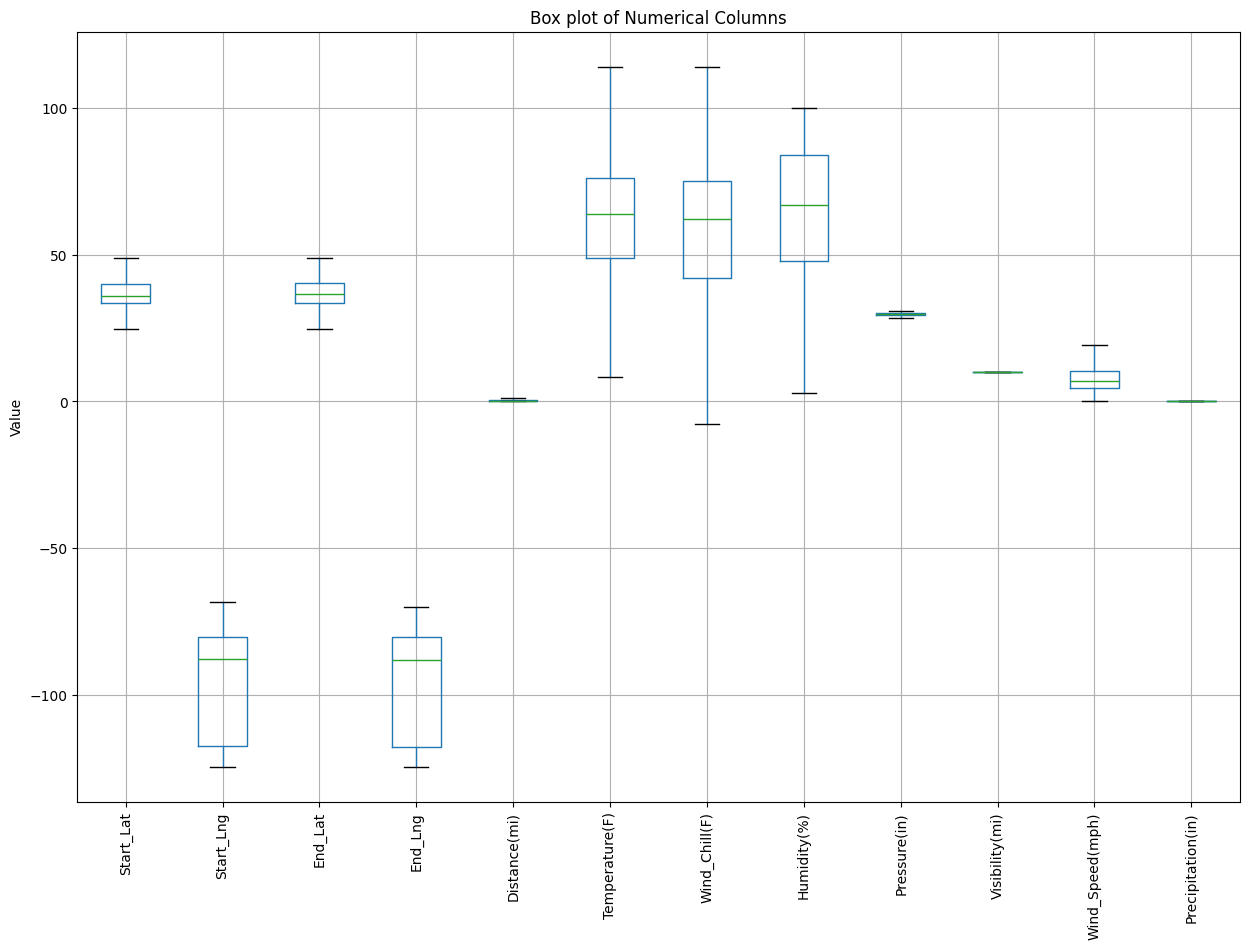

<Figure size 640x480 with 0 Axes>

In [82]:
# Select numerical columns for box plotting
numerical_cols = ['Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
                  'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
                  'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

# Create box plots for selected numerical columns
plt.figure(figsize=(15, 10))
df[numerical_cols].boxplot()
plt.xticks(rotation=90)
plt.title('Box plot of Numerical Columns')
plt.ylabel('Value')
plt.show()
plt.savefig('boxplot_numerical_columns.png')


Capping outliers for: Start_Lat
Capping outliers for: Start_Lng
Capping outliers for: End_Lat
Capping outliers for: End_Lng
Capping outliers for: Distance(mi)
Capping outliers for: Temperature(F)
Capping outliers for: Wind_Chill(F)
Capping outliers for: Humidity(%)
Capping outliers for: Pressure(in)
Capping outliers for: Visibility(mi)
Capping outliers for: Wind_Speed(mph)
Capping outliers for: Precipitation(in)


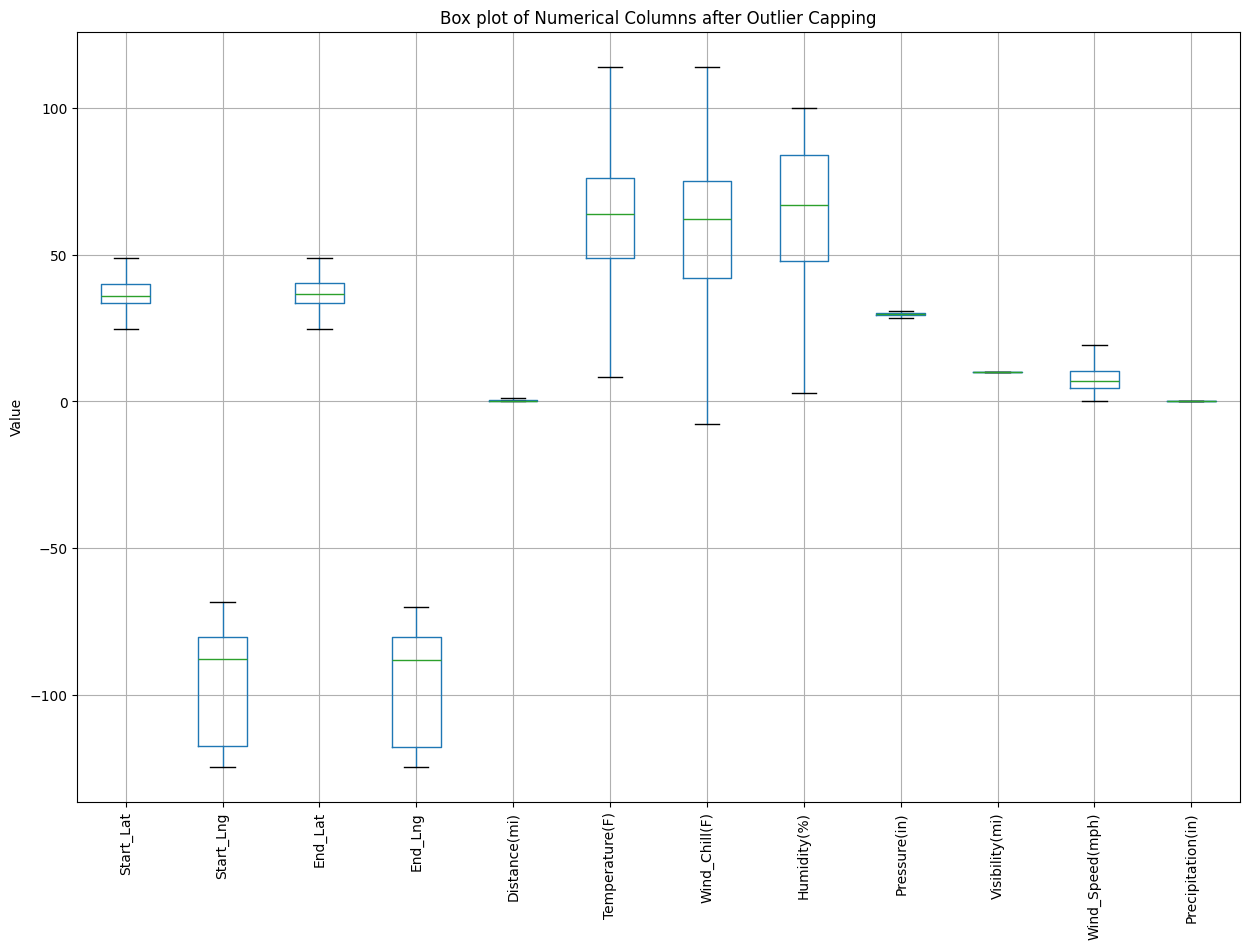

<Figure size 640x480 with 0 Axes>

In [83]:


# Handle outliers by capping using the IQR method
def cap_outliers_iqr(df, column):
  """
  Caps outliers in a specified column of a DataFrame using the IQR method.
  Values below the lower bound are set to the lower bound, and values
  above the upper bound are set to the upper bound.

  Args:
      df (pd.DataFrame): The input DataFrame.
      column (str): The name of the column to cap outliers in.

  Returns:
      pd.Series: The column with outliers capped.
  """
  q1 = df[column].quantile(0.25)
  q3 = df[column].quantile(0.75)
  iqr = q3 - q1
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr
  df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
  df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
  return df[column]

# Apply capping to numerical columns that show outliers in the box plot
numerical_cols_to_cap = ['Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
                         'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
                         'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)']

for col in numerical_cols_to_cap:
  if col in df.columns: # Check if the column exists before processing
    print(f"Capping outliers for: {col}")
    df[col] = cap_outliers_iqr(df.copy(), col) # Use copy to avoid modifying the original column during quantile calculation

# Verify capping by plotting box plots again
plt.figure(figsize=(15, 10))
df[numerical_cols_to_cap].boxplot()
plt.xticks(rotation=90)
plt.title('Box plot of Numerical Columns after Outlier Capping')
plt.ylabel('Value')
plt.show()

plt.savefig('boxplot_numerical_columns_outlier handled.png')

In [76]:
columns

['ID',
 'Source',
 'Severity',
 'Start_Time',
 'End_Time',
 'Start_Lat',
 'Start_Lng',
 'End_Lat',
 'End_Lng',
 'Distance(mi)',
 'Description',
 'Street',
 'City',
 'County',
 'State',
 'Zipcode',
 'Country',
 'Timezone',
 'Airport_Code',
 'Weather_Timestamp',
 'Temperature(F)',
 'Wind_Chill(F)',
 'Humidity(%)',
 'Pressure(in)',
 'Visibility(mi)',
 'Wind_Direction',
 'Wind_Speed(mph)',
 'Precipitation(in)',
 'Weather_Condition',
 'Amenity',
 'Bump',
 'Crossing',
 'Give_Way',
 'Junction',
 'No_Exit',
 'Railway',
 'Roundabout',
 'Station',
 'Stop',
 'Traffic_Calming',
 'Traffic_Signal',
 'Turning_Loop',
 'Sunrise_Sunset',
 'Civil_Twilight',
 'Nautical_Twilight',
 'Astronomical_Twilight']

In [78]:
!pip install folium

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.5/112.5 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.4/90.4 kB 6.5 MB/s eta 0:00:00


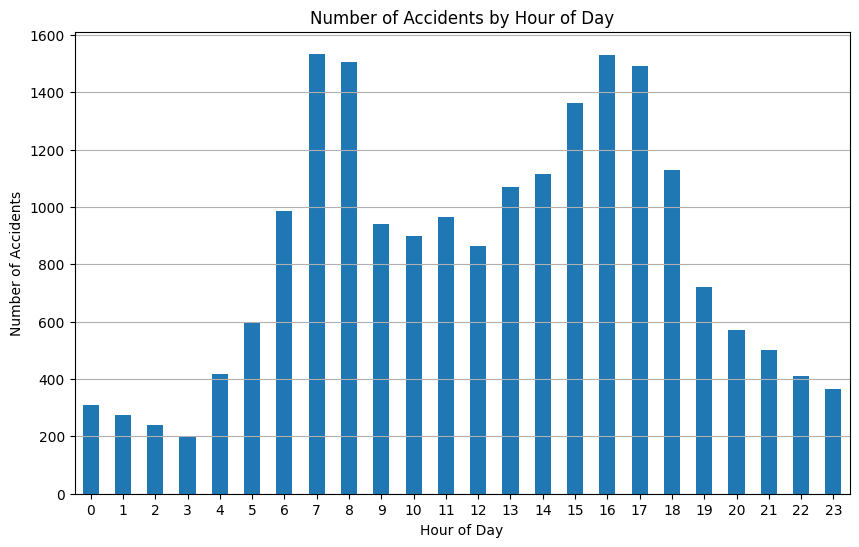

<Figure size 640x480 with 0 Axes>

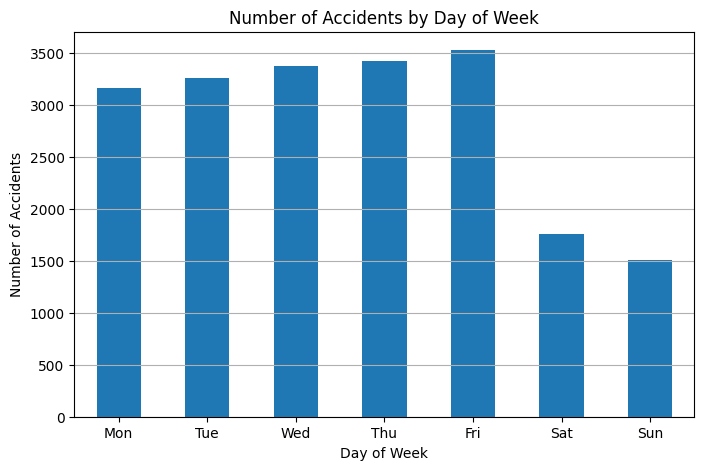

<Figure size 640x480 with 0 Axes>

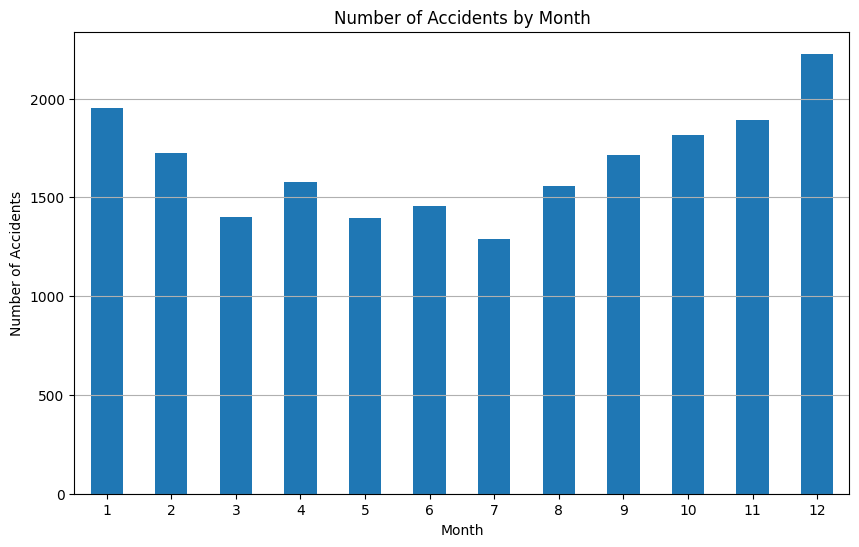

<Figure size 640x480 with 0 Axes>

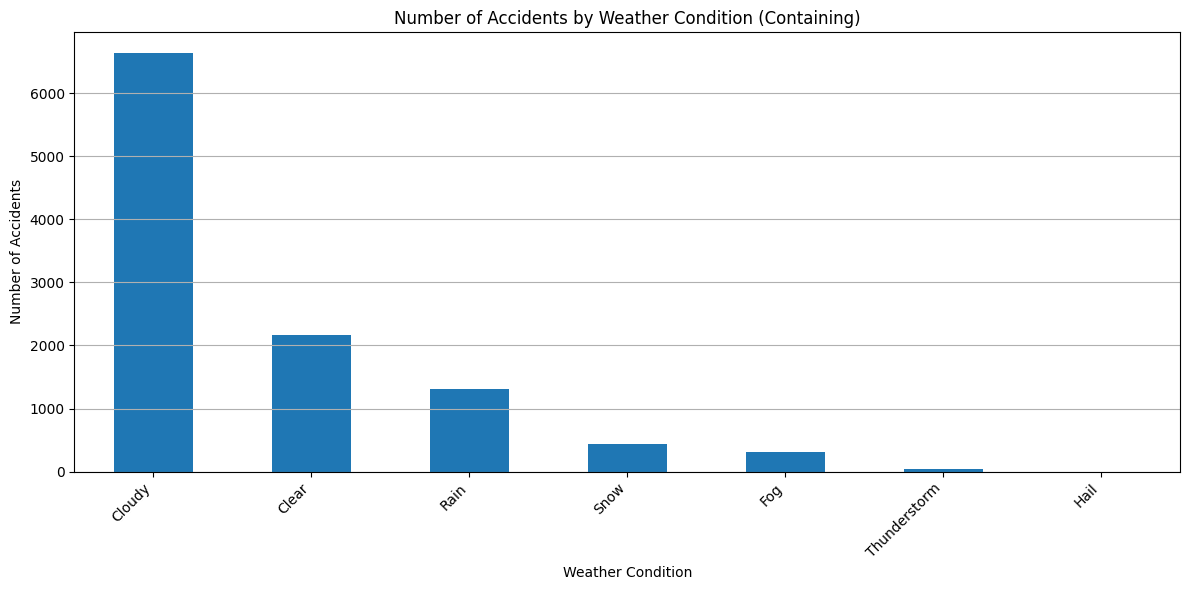

<Figure size 640x480 with 0 Axes>

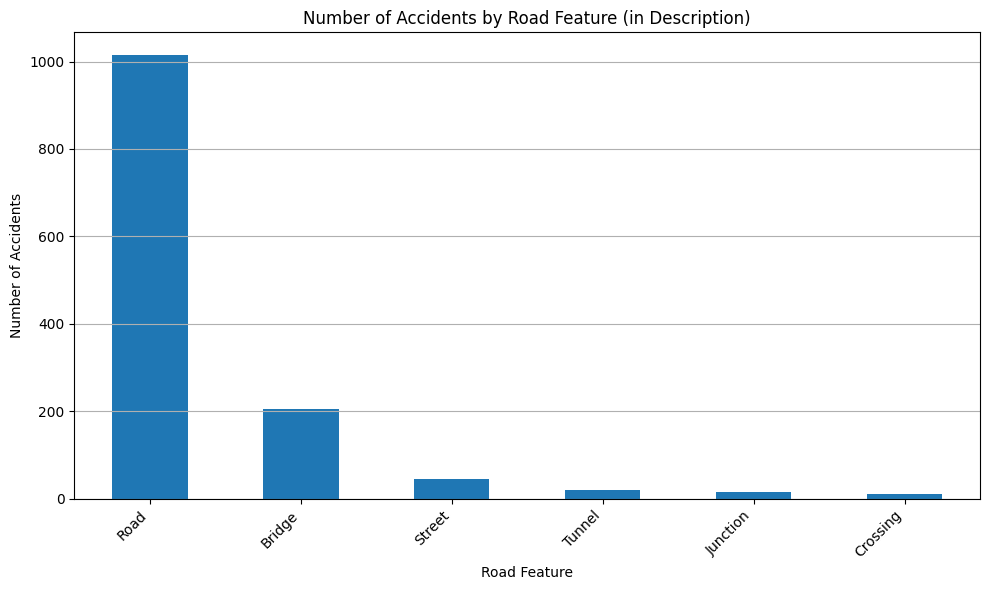

<Figure size 640x480 with 0 Axes>

In [85]:
import folium
from folium.plugins import HeatMap

# Analyze patterns related to road conditions, weather, and time of day
# Extract features related to time of day, day of week, and month
df['Hour'] = df['Start_Time'].dt.hour
df['Day_of_Week'] = df['Start_Time'].dt.dayofweek  # Monday=0, Sunday=6
df['Month'] = df['Start_Time'].dt.month

# Analyze accidents by time of day
accidents_by_hour = df['Hour'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
accidents_by_hour.plot(kind='bar')
plt.title('Number of Accidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()
plt.savefig('Number of Accident by hour.png')

# Analyze accidents by day of week
accidents_by_day_of_week = df['Day_of_Week'].value_counts().sort_index()
days = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.figure(figsize=(8, 5))
accidents_by_day_of_week.plot(kind='bar')
plt.title('Number of Accidents by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.xticks(ticks=np.arange(7), labels=days, rotation=0)
plt.grid(axis='y')
plt.show()
plt.savefig('Number of Accident by week.png')


# Analyze accidents by month
accidents_by_month = df['Month'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
accidents_by_month.plot(kind='bar')
plt.title('Number of Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()
plt.savefig('accidents by month.png')


# Analyze the impact of weather conditions
weather_conditions = ['Clear', 'Cloudy', 'Rain', 'Snow', 'Fog', 'Hail', 'Thunderstorm']
weather_accidents = {}
for condition in weather_conditions:
  # Using .str.contains with regex=False for better performance if no regex needed
  weather_accidents[condition] = df[df['Weather_Condition'].str.contains(condition, na=False, case=False, regex=False)].shape[0]

weather_accidents_series = pd.Series(weather_accidents)
plt.figure(figsize=(12, 6))
weather_accidents_series.sort_values(ascending=False).plot(kind='bar')
plt.title('Number of Accidents by Weather Condition (Containing)')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
plt.savefig('Number of Accidents by Weather Condition (Containing).png')


# Analyze the impact of road conditions (assuming 'Street', 'Road', 'Junction', etc. in Description)
road_features = ['Street', 'Road', 'Junction', 'Crossing', 'Bridge', 'Tunnel'] # Example road-related keywords
road_accidents = {}
for feature in road_features:
     # Using .str.contains with regex=False
    road_accidents[feature] = df[df['Description'].str.contains(feature, na=False, case=False, regex=False)].shape[0]

road_accidents_series = pd.Series(road_accidents)
plt.figure(figsize=(10, 6))
road_accidents_series.sort_values(ascending=False).plot(kind='bar')
plt.title('Number of Accidents by Road Feature (in Description)')
plt.xlabel('Road Feature')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()
plt.savefig('Number of Accidents by Road Feature (in Description).png')



# Visualize accident hotspots using a Heatmap
# Filter out rows with missing latitude or longitude
heatmap_data = df[['Start_Lat', 'Start_Lng']].dropna()

# Create a base map centered around the mean location of accidents
# Ensure mean calculation handles potential NaNs in original data
mean_lat = heatmap_data['Start_Lat'].mean()
mean_lng = heatmap_data['Start_Lng'].mean()
m = folium.Map(location=[mean_lat, mean_lng], zoom_start=5)

# Add heatmap layer
HeatMap(heatmap_data, radius=10, gradient={0.2: 'blue', 0.4: 'cyan', 0.6: 'lime', 0.8: 'yellow', 1: 'red'}).add_to(m)

# Display the map (in a notebook environment)
m